### **1- Getting First 5 Rows** 

In [5]:
import pandas as pd

df = pd.read_csv("../data/raw/dirty_cafe_sales.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


### **2- Getting General Understanding**

In [9]:
df.shape
df.columns
df.info()
df.describe(include="all")



<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Transaction ID    10000 non-null  str  
 1   Item              9667 non-null   str  
 2   Quantity          9862 non-null   str  
 3   Price Per Unit    9821 non-null   str  
 4   Total Spent       9827 non-null   str  
 5   Payment Method    7421 non-null   str  
 6   Location          6735 non-null   str  
 7   Transaction Date  9841 non-null   str  
dtypes: str(8)
memory usage: 625.1 KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [12]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  str           
 1   Item              9667 non-null   str           
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   str           
 6   Location          6735 non-null   str           
 7   Transaction Date  9540 non-null   datetime64[us]
dtypes: datetime64[us](1), float64(3), str(4)
memory usage: 625.1 KB


### **3- Missing Value Standardisation (Categorical Columns)- Missing categorical values were filled with “NA” to preserve records and explicitly represent unrecorded information.**

In [ ]:

invalid_tokens = ["", "unknown", "error", "n/a", "na", "null"]

categorical_cols = ["Payment Method", "Location", "Item"]

for col in categorical_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .replace(invalid_tokens, pd.NA)
    )

# Check results
for col in categorical_cols:
    print("\n")
    print(df[col].value_counts(dropna=False))





Payment Method
NaN               3178
digital wallet    2291
credit card       2273
cash              2258
Name: count, dtype: int64


Location
NaN         3961
takeaway    3022
in-store    3017
Name: count, dtype: int64


Item
juice       1171
coffee      1165
salad       1148
cake        1139
sandwich    1131
smoothie    1096
cookie      1092
tea         1089
NaN          969
Name: count, dtype: int64


### **4- Missing Value Standardisation (Numeric Columns)**

In [25]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

df[["Quantity", "Price Per Unit", "Total Spent"]].isna().sum()


Quantity          479
Price Per Unit    533
Total Spent       502
dtype: int64

5- Dropping rows that has missing values in Sales (NA in Quantity or Price) as this is essential for computing sales value. This leaves me with 95% of data

In [ ]:
df_clean = df.dropna(subset=["Quantity", "Price Per Unit"]) #this line removes NA rows within these columns 
df_clean.shape


(9006, 8)

### **5- Basic Summary Statistics**

Standard Deviation (std) -> measures how spread out data points are from the mean (average)


Mean -> average 

Median -> the middle value of an ordered dataset. This is in the row labeled 50%

In [29]:
df_clean[["Quantity", "Price Per Unit", "Total Spent"]].describe()


,Quantity,Price Per Unit,Total Spent
count,9006.000000,9006.000000,8544.000000
mean,3.023540,2.951865,8.929073
std,1.418644,1.277659,5.999898
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


### **6- Visualisation**

In [45]:
import matplotlib.pyplot as plt

item_counts = df_clean["Item"].value_counts().reset_index()
item_counts.columns = ["Item", "Number of Transactions"]

item_counts



,Item,Number of Transactions
0,juice,1063
1,coffee,1048
2,cake,1042
3,salad,1030
4,sandwich,1022
5,smoothie,994
6,cookie,976
7,tea,972


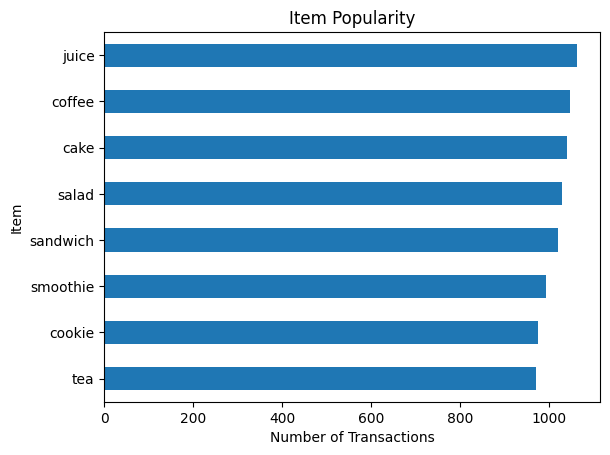

In [37]:
df_clean["Item"].value_counts().sort_values().plot(kind="barh")
plt.title("Item Popularity")
plt.xlabel("Number of Transactions")
plt.ylabel("Item")
plt.show()

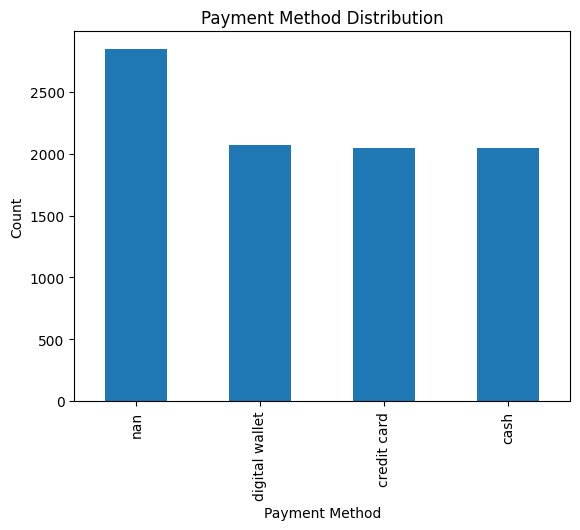

In [32]:
df_clean["Payment Method"].value_counts(dropna=False).plot(kind="bar")
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()


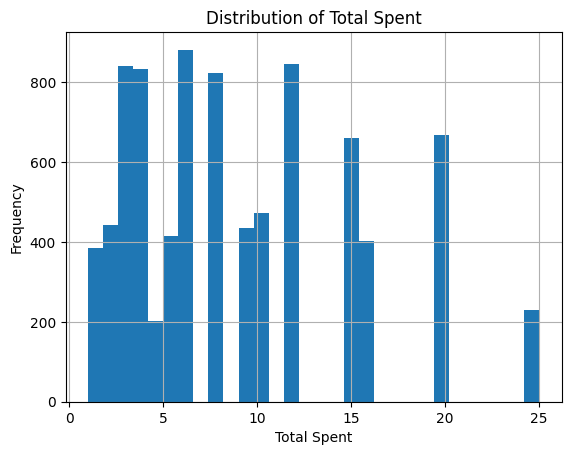

In [34]:
df_clean["Total Spent"].hist(bins=30)
plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()


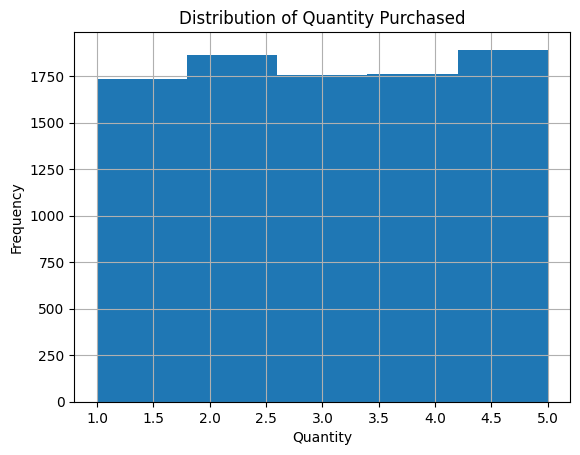

In [36]:
df_clean["Quantity"].hist(bins=5)
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()
